In [1]:
import sys
sys.path.append("..")

# basics
import numpy as np
import scipy
import matplotlib.pyplot as plt
import copy
import qutip

# custom stuff
import system.from_higher_basis_truncation_tunable_full_cosine as system
import utils.solver as solver
import pulse.tukey as tukey
import utils.expectation_values as expv
import utils.graph as graph
import utils.saver as saver

# parallel utils
from qutip.parallel import parallel_map as parallel_map
from qutip.parallel import parfor as parfor

pass

In [2]:
# Start with a pulse data from landscapes/FlatTop
# data selected so that we start on first fringe

# Need to generate plot and look for abrupt changes in duration or fidelity
# Generate fidelity landscapes at those changes to determine where the fringe is
# Rerun with manually set initial conditions

initial_duration = 10
initial_offset = 0.2627118644067797
initial_amplitude = 11.100294042683936
final_amplitude = 4 * 2 * np.pi
fidelity_threshold = 0.999
ramp_coef = 0.5

def cost(parameters, constants):
    global last_offset, last_duration
    duration = parameters[0]
    offset = parameters[1]
    amplitude = constants[0]
    freq = system.first_energy_spacing/3 - offset
    tlist = np.arange(0, duration, (2*np.pi)/(freq*20))
    tukey.setup(amplitude, freq, ramp_coef, tlist)
    s = solver.time_evolve(system.H0, system.H1, tukey.pulse_func, tlist, system.starting_state, pbar=True)
    fidelity = expv.expectation_value(s.final_state, system.target_state)
    # graph.graph_solution(s, system)
    print("amplitude", amplitude, "duration", duration, "offset", offset, "fidelity", fidelity)

    # if fidelity > fidelity_threshold:
    #     results.append({
    #         "amplitude": amplitude,
    #         "offset": offset,
    #         "duration": duration,
    #         "fidelity": fidelity,
    #         "end_early": True
    #     })
    #     last_duration = duration
    #     last_offset = offset
    #     raise RuntimeError

    return (1 - fidelity)

last_duration = initial_duration
last_offset = initial_offset
results = []
for amplitude in np.linspace(initial_amplitude, final_amplitude, 25):
    try:
        result = scipy.optimize.minimize(cost, [last_duration, last_offset], [amplitude], method="Nelder-Mead", options={"disp":True})
        results.append({
            "amplitude": amplitude,
            "offset": result.x[1],
            "duration": result.x[0],
            "fidelity": 1-result.fun,
            "end_early": False,
            "iterations": result.nit
        })
        last_duration = result.x[0]
        last_offset = result.x[1]
    except:
        print("error!")


amplitude 11.100294042683936 duration 10.0 offset 0.2627118644067797 fidelity 0.181410708950051
amplitude 11.100294042683936 duration 10.5 offset 0.2627118644067797 fidelity 0.19686786642769347
amplitude 11.100294042683936 duration 10.0 offset 0.27584745762711865 fidelity 0.17949282100260794
amplitude 11.100294042683936 duration 10.5 offset 0.2495762711864407 fidelity 0.1954517069503091
amplitude 11.100294042683936 duration 11.0 offset 0.2495762711864407 fidelity 0.21453060173456193
amplitude 11.100294042683936 duration 11.5 offset 0.24300847457627117 fidelity 0.23142178022266022
amplitude 11.100294042683936 duration 11.5 offset 0.2561440677966102 fidelity 0.23564124704437475
amplitude 11.100294042683936 duration 12.0 offset 0.25942796610169494 fidelity 0.2532221230677044
amplitude 11.100294042683936 duration 13.0 offset 0.23972457627118643 fidelity 0.2851559648708704
amplitude 11.100294042683936 duration 14.25 offset 0.22823093220338986 fidelity 0.31605136437775483
amplitude 11.100294

In [13]:
for amplitude in np.linspace(final_amplitude, final_amplitude*2, 25):
    try:
        result = scipy.optimize.minimize(cost, [last_duration, last_offset], [amplitude], method="Nelder-Mead", options={"disp":True})
        results.append({
            "amplitude": amplitude,
            "offset": result.x[1],
            "duration": result.x[0],
            "fidelity": 1-result.fun,
            "end_early": False,
            "iterations": result.nit
        })
        last_duration = result.x[0]
        last_offset = result.x[1]
    except:
        print("error!")

amplitude 25.132741228718345 duration 3.149520985472221 offset 1.5002511174710649 fidelity 0.7635325249220754
amplitude 25.132741228718345 duration 3.3069970347458324 offset 1.5002511174710649 fidelity 0.6158865465869259
amplitude 25.132741228718345 duration 3.149520985472221 offset 1.5752636733446181 fidelity 0.7437988902806204
amplitude 25.132741228718345 duration 2.9920449361986097 offset 1.5752636733446184 fidelity 0.6888803417249649
amplitude 25.132741228718345 duration 3.070782960835415 offset 1.55651053437623 fidelity 0.7345062098877627
amplitude 25.132741228718345 duration 3.228259010109027 offset 1.5190042564394532 fidelity 0.7457560229792861
amplitude 25.132741228718345 duration 3.228259010109027 offset 1.4439917005658998 fidelity 0.6923589710980527
amplitude 25.132741228718345 duration 3.1692054916314225 offset 1.5424456801499384 fidelity 0.7587266012056242
amplitude 25.132741228718345 duration 3.0904674669946166 offset 1.52369254118155 fidelity 0.7321495294409742
amplitude 

In [24]:
for amplitude in np.linspace(initial_amplitude, 2, 50):
    try:
        result = scipy.optimize.minimize(cost, [last_duration, last_offset], [amplitude], method="Nelder-Mead", options={"disp":True})
        results.insert(0, {
            "amplitude": amplitude,
            "offset": result.x[1],
            "duration": result.x[0],
            "fidelity": 1-result.fun,
            "end_early": False,
            "iterations": result.nit
        })
        last_duration = result.x[0]
        last_offset = result.x[1]
    except:
        print("error!")

amplitude 11.100294042683936 duration 2.339828877575891 offset 1.3972029738237337 fidelity 0.0014023098809208554
amplitude 11.100294042683936 duration 2.4568203214546855 offset 1.3972029738237337 fidelity 0.0004499467561088254
amplitude 11.100294042683936 duration 2.339828877575891 offset 1.4670631225149204 fidelity 0.0005910429071416306
amplitude 11.100294042683936 duration 2.222837433697096 offset 1.4670631225149204 fidelity 0.0010533071553277696
amplitude 11.100294042683936 duration 2.222837433697096 offset 1.3972029738237337 fidelity 0.0012667159546914972
amplitude 11.100294042683936 duration 2.339828877575891 offset 1.327342825132547 fidelity 0.0013436482421218285
amplitude 11.100294042683936 duration 2.4568203214546855 offset 1.327342825132547 fidelity 0.0004564917216982039
amplitude 11.100294042683936 duration 2.2813331556364935 offset 1.379737936650937 fidelity 0.002180196016206399
amplitude 11.100294042683936 duration 2.281333155636493 offset 1.4495980853421235 fidelity 0.0015

capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.


 4.785804298780797 duration 1.6971204190728644 offset -0.40568726834552615 fidelity 0.003117301564734797
amplitude 4.785804298780797 duration 1.8311036100523013 offset -0.39119843733318593 fidelity 0.004366510807942096
amplitude 4.785804298780797 duration 1.7417814827326765 offset -0.4008576580080794 fidelity 0.004074433218807519
amplitude 4.785804298780797 duration 1.8087730782223952 offset -0.3936132425019093 fidelity 0.004377308985087065
amplitude 4.785804298780797 duration 1.7641120145625826 offset -0.398442852839356 fidelity 0.004085361339899461
amplitude 4.785804298780797 duration 1.797607812307442 offset -0.394820645086271 fidelity 0.004557030499485466
amplitude 4.785804298780797 duration 1.7976078123074417 offset -0.414139086436058 fidelity 0.004551027278669963
amplitude 4.785804298780797 duration 1.7892338628712272 offset -0.39331139185581887 fidelity 0.0045568789154025666
amplitude 4.785804298780797 duration 1.8003991287861802 offset -0.38244476859656373 fidelity 0.0045531534

In [14]:
fids = []
durs = []
offs = []
amps = []

for o in results:
    amps.append(o["amplitude"])
    durs.append(o["duration"])
    offs.append(o["offset"])
    fids.append(o["fidelity"])

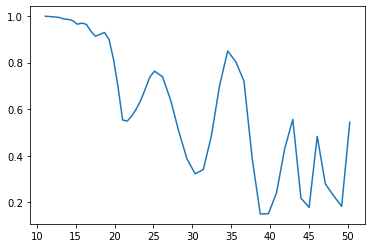

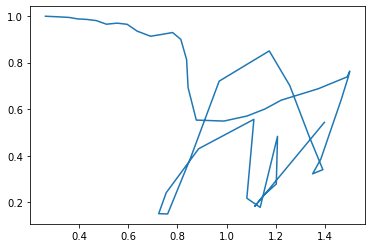

In [16]:
plt.plot(amps, fids)
plt.show()
plt.plot(offs, fids)

In [18]:
results[20]

{'amplitude': 22.794000031045943,
 'offset': 1.1556701021080515,
 'duration': 3.087844448817367,
 'fidelity': 0.60088539894523,
 'end_early': False,
 'iterations': 40}

100%|██████████| 50/50 [1:19:10<00:00, 95.01s/it]


[[0.0073771065438025364,
  0.11721158676126196,
  0.028917601919125353,
  0.002521661244848888,
  2.251930653994957e-05,
  0.00047023875347728083,
  0.00047309723203929984,
  0.00027993885486166396,
  0.00013689538700378419,
  6.438033247289492e-05,
  3.1388908467549714e-05,
  1.6362891032387786e-05,
  9.014895041950823e-06,
  5.182216107941739e-06,
  3.0287402343745118e-06,
  1.7713497818590063e-06,
  1.0365797079709462e-06,
  5.95623249705481e-07,
  3.3351154272981625e-07,
  1.7287924232090897e-07,
  7.301285492439721e-08,
  1.8784209296278415e-08,
  5.573567436489679e-09,
  4.5289448490449226e-09,
  7.255897241419104e-09,
  1.8209335360772133e-08,
  4.221740557176189e-08,
  6.895011277328903e-08,
  8.18502551006644e-08,
  7.691586637464316e-08,
  8.184656488465873e-08,
  9.99209392038925e-08,
  1.2287435995935838e-07,
  1.2475925455155753e-07,
  1.2353017868146395e-07,
  1.2455776628242148e-07,
  1.2923523169716867e-07,
  1.3617425761484408e-07,
  1.42846943868964e-07,
  1.448300607

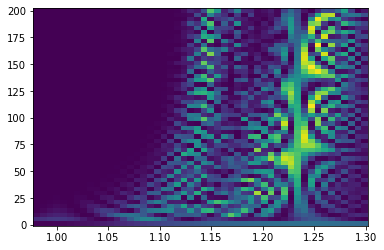

In [23]:
import importlib
importlib.reload(graph)
i = 20
freq = system.first_energy_spacing/3 - results[i]['offset']
dur = results[i]['duration']
tukey.setup(results[i]['amplitude'], freq , ramp_coef, np.linspace(0,10))
graph.generate_fidelity_landscape_tukey(system, tukey, np.linspace(freq-1, freq+1), np.linspace(1, 200))